In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("washing_machine.csv")
data

,index,name,price,number_of_comment,brand,size,type,weight(kg),comment
0,0,Máy giặt Toshiba Inverter 8.5 Kg TW-BH95S2V WK,5999000,131,Toshiba,RxSxC 595 x 53 x 85 cm,Cửa trước,68,Ổn trong tầm giá Với giá này thì tôi hoàn toàn...
1,0,Máy giặt Toshiba Inverter 8.5 Kg TW-BH95S2V WK,5999000,131,Toshiba,RxSxC 595 x 53 x 85 cm,Cửa trước,68,Giao hàng nhanh có thợ lắp ráp ngay không phải...
2,0,Máy giặt Toshiba Inverter 8.5 Kg TW-BH95S2V WK,5999000,131,Toshiba,RxSxC 595 x 53 x 85 cm,Cửa trước,68,Mình nhận xét sau khi mua sản phẩm Máy giặt To...
3,0,Máy giặt Toshiba Inverter 8.5 Kg TW-BH95S2V WK,5999000,131,Toshiba,RxSxC 595 x 53 x 85 cm,Cửa trước,68,Dịch vụ rất tốt giao nhận nhiệt tình vui vẻ hỗ...
4,0,Máy giặt Toshiba Inverter 8.5 Kg TW-BH95S2V WK,5999000,131,Toshiba,RxSxC 595 x 53 x 85 cm,Cửa trước,68,Ai nói máy này ồn thì là nói xạo nhé Để chế độ...
...,...,...,...,...,...,...,...,...,...
2495,554,Máy giặt Aqua 11kg AQW-FW110FT-N - HÀNG CHÍNH ...,5959000,0,Aqua,NaN,Cửa trên,48,NaN
2496,555,Máy giặt Aqua Inverter 10.5 kg AQD-D1050E N,9290000,0,Aqua,595 x 595 x 845 cm,Cửa trước,80,NaN
2497,556,Máy Giặt Cửa Trước Samsung Inverter WW90J54E0B...,8290000,0,Samsung,NaN,NaN,NaN,NaN
2498,557,Máy giặt Electrolux Inverter 9 kg EWF9024BDWA ...,9490000,0,Electrolux,NaN,Cửa trước,NaN,NaN


In [3]:
data.dropna(subset=['comment'], inplace=True)

In [4]:
review_predict = data['comment']

In [5]:
sentiment = pd.read_csv('text.csv',index_col=[0])
sentiment

,text_lb,text
2,1.0,"Ấn tượng, tôi sẽ quay lại vào dịp nghỉ lần sau"
3,1.0,"Quá tuyệt vời , view đẹp , chủ nhà thân thiện ..."
6,1.0,"Phòng nghỉ đáng giá, tiện nghi cơ bản đầy đủ ^..."
7,1.0,Thuận tiện cho việc đi thăm thú cảnh quan.\nBạ...
10,1.0,Nhân viên thân thiện
...,...,...
6994,1.0,"Anh chủ rất là nhiệt tình và vui vẻ, phòng sạc..."
6995,1.0,"Vị trí đẹp, mặc dù chúng tôi là khách duy nhất..."
6996,-1.0,"Không có chỗ đỗ xe, phải gửi xe ở ngoài rất tố..."
6997,1.0,"Gửi quản lý cấp cao của khách sạn, Rất tiếc hì..."


In [6]:
with open('vietnamese_stopwords.txt', encoding="utf8") as f:
    stopwords = []
    for line in f:
        stopwords.append("_".join(line.strip().split()))

In [7]:
import re
from pyvi import ViTokenizer
def preprocessor(text):
    corpus = []
    for i in range(0, len(text)):
        review = re.sub(r"http\S+", "", str(text[i]))
        review = re.sub(r"#\S+", "", review)
        review = re.sub(r"@\S+", "", review)
        review = re.sub('[_]',' ',review)
        review = re.sub('[^a-zA-Z_áàạảãăắằặẵẳâấầẩậẫđíỉìịĩóòỏọõôốồổộỗơớờởợỡéèẹẽẻêếềểệễúùủũụưứừửựữýỳỷỹỵÁÀẢÃẠĂẮẰẲẲẶẴÂẤẦẬẪẨĐÍÌỈỊĨÓÒỎỌÕÔỐỒỔỘỖƠỚỜỞỢỠÉÈẺẸẼÊẾỀỆỂỄÚÙỦŨỤƯỨỪỬỰỮÝỲỶỴỸ]',
                        ' ',review)
        review = ViTokenizer.tokenize(review)
        review = review.lower()
        review = review.split()
        review = [word for word in review if not word in  set(stopwords)]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [8]:
X = sentiment['text'].values
corpus = preprocessor(X)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=30000)
tfidf_vect.fit(corpus) 
X_data_tfidf =  tfidf_vect.transform(corpus)

from sklearn.model_selection import train_test_split
X = X_data_tfidf
y = sentiment['text_lb'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
predictions = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))

accuracy: 0.8759615384615385


In [10]:
from sklearn import svm
classifier = svm.SVC(probability=True)
classifier.fit(X_train, y_train)
train_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

accuracy: 0.885576923076923
confusion matrix:
 [[ 84 100]
 [ 19 837]]
classification report:
               precision    recall  f1-score   support

        -1.0       0.82      0.46      0.59       184
         1.0       0.89      0.98      0.93       856

    accuracy                           0.89      1040
   macro avg       0.85      0.72      0.76      1040
weighted avg       0.88      0.89      0.87      1040



In [11]:
X_1 = review_predict.values
corpus1 = preprocessor(X_1)
X_data_tfidf_1 =  tfidf_vect.transform(corpus1)

In [12]:
proba = classifier.predict_proba(X_data_tfidf_1)

In [13]:
df1 = pd.DataFrame(data=proba, columns=['Negative', 'Positive'])

In [14]:
data = pd.concat([data, df1], axis = 1).drop(columns = ['comment'])
data

,index,name,price,number_of_comment,brand,size,type,weight(kg),Negative,Positive
0,0.0,Máy giặt Toshiba Inverter 8.5 Kg TW-BH95S2V WK,5999000.0,131.0,Toshiba,RxSxC 595 x 53 x 85 cm,Cửa trước,68,0.102123,0.897877
1,0.0,Máy giặt Toshiba Inverter 8.5 Kg TW-BH95S2V WK,5999000.0,131.0,Toshiba,RxSxC 595 x 53 x 85 cm,Cửa trước,68,0.286041,0.713959
2,0.0,Máy giặt Toshiba Inverter 8.5 Kg TW-BH95S2V WK,5999000.0,131.0,Toshiba,RxSxC 595 x 53 x 85 cm,Cửa trước,68,0.794813,0.205187
3,0.0,Máy giặt Toshiba Inverter 8.5 Kg TW-BH95S2V WK,5999000.0,131.0,Toshiba,RxSxC 595 x 53 x 85 cm,Cửa trước,68,0.253567,0.746433
4,0.0,Máy giặt Toshiba Inverter 8.5 Kg TW-BH95S2V WK,5999000.0,131.0,Toshiba,RxSxC 595 x 53 x 85 cm,Cửa trước,68,0.289263,0.710737
...,...,...,...,...,...,...,...,...,...,...
2473,534.0,Máy Giặt Cửa Ngang Inverter Electrolux EWF1402...,14690000.0,2.0,Electrolux,Cao 850 x Rông 600 x Sâu 669 mm,Cửa trước,70,NaN,NaN
2474,534.0,Máy Giặt Cửa Ngang Inverter Electrolux EWF1402...,14690000.0,2.0,Electrolux,Cao 850 x Rông 600 x Sâu 669 mm,Cửa trước,70,NaN,NaN
2476,536.0,Máy giặt Electrolux Inverter 9 kg EWF12938,10900000.0,2.0,Electrolux,60 x 669 x 85 cm D x R x C,Cửa trước,NaN,NaN,NaN
2477,536.0,Máy giặt Electrolux Inverter 9 kg EWF12938,10900000.0,2.0,Electrolux,60 x 669 x 85 cm D x R x C,Cửa trước,NaN,NaN,NaN


In [15]:
group_data = data.groupby(['index', 'name', 'price', 'number_of_comment', 'size', 'brand', 'type', 'weight(kg)'], as_index=False, dropna=False).mean()
group_data['rank_point'] = group_data.number_of_comment * group_data.Positive
group_data

,index,name,price,number_of_comment,size,brand,type,weight(kg),Negative,Positive,rank_point
0,0.0,Máy giặt Toshiba Inverter 8.5 Kg TW-BH95S2V WK,5999000.0,131.0,RxSxC 595 x 53 x 85 cm,Toshiba,Cửa trước,68,0.215392,0.784608,102.783709
1,1.0,Máy giặt Electrolux Inverter 8 Kg EWF8025DGWA,6589000.0,87.0,Cao 85cm Ngang 600cm Sâu 568cm,Electrolux,Cửa trước,NaN,0.232685,0.767315,66.756388
2,2.0,Máy giặt Electrolux Inverter 8 Kg EWF8025DGWA,6590000.0,46.0,Cao 85cm Ngang 600cm Sâu 568cm,Electrolux,Cửa trước,NaN,0.289113,0.710887,32.700781
3,3.0,Máy Giặt Sấy LG Inverter 9 Kg FV1409G4V - Chỉ ...,12479000.0,19.0,60 x 55 x 85 cm,LG,Cửa trước,69,0.183212,0.816788,15.518975
4,4.0,Máy giặt Toshiba Inverter 8.5 Kg TW-BH95S2V WK,6049000.0,60.0,RxSxC 595 x 53 x 85 cm,Toshiba,Cửa trước,68,0.239360,0.760640,45.638402
...,...,...,...,...,...,...,...,...,...,...,...
262,533.0,Máy Giặt Cửa Trước Samsung Inverter Addwash WW...,9990000.0,1.0,NaN,Samsung,NaN,NaN,NaN,NaN,NaN
263,534.0,Máy Giặt Cửa Ngang Inverter Electrolux EWF1402...,14690000.0,2.0,Cao 850 x Rông 600 x Sâu 669 mm,Electrolux,Cửa trước,70,NaN,NaN,NaN
264,536.0,Máy giặt Electrolux Inverter 9 kg EWF12938,10900000.0,2.0,60 x 669 x 85 cm D x R x C,Electrolux,Cửa trước,NaN,NaN,NaN,NaN
265,543.0,Máy giặt Electrolux Inverter 9.5 kg EWF9523BDWA,11190000.0,1.0,60 x 659 x 85 cm,Electrolux,Cửa trước,71,NaN,NaN,NaN


In [17]:
rank_data = group_data.drop(columns=['index', 'name', 'brand', 'size', 'type', 'number_of_comment', 'Negative', 'Positive'])
rank_data.values

array([[5999000.0, '68', 102.78370850106694],
       [6589000.0, nan, 66.75638839822199],
       [6590000.0, nan, 32.700781261065316],
       [12479000.0, '69', 15.518975263503398],
       [6049000.0, '68', 45.638402270221654],
       [6179000.0, '63', 13.873581774722698],
       [6999000.0, '63', 30.52519506811947],
       [3649000.0, nan, 32.04126025354456],
       [7790000.0, '68', 24.100369823477898],
       [7690000.0, '68', 11.925091371894545],
       [9870000.0, '63', 19.696169820593717],
       [3650000.0, nan, 70.57035916613822],
       [7499000.0, '63', 8.5751206209115],
       [8669000.0, 'Đang cập nhật', 20.38095581376875],
       [10190000.0, nan, 11.52355834365494],
       [7090000.0, '62', 16.271989137017044],
       [9990000.0, nan, 18.88046496477631],
       [10590000.0, nan, 8.854950661902002],
       [8490000.0, '62', 76.0471660097486],
       [6299000.0, '61', 3.5890570949176954],
       [12199000.0, '69', 11.57994722925726],
       [8379000.0, '62', 8.2930848078208

In [18]:
pd.set_option('display.max_rows', rank_data.shape[0]+1)
rank_data[lambda col :rank_data.columns] = rank_data[lambda col :rank_data.columns].replace(r'\D+', np.NaN, regex=True)
rank_data

,price,weight(kg),rank_point
0,5999000.0,68,102.783709
1,6589000.0,NaN,66.756388
2,6590000.0,NaN,32.700781
3,12479000.0,69,15.518975
4,6049000.0,68,45.638402
5,6179000.0,63,13.873582
6,6999000.0,63,30.525195
7,3649000.0,NaN,32.041260
8,7790000.0,68,24.100370
9,7690000.0,68,11.925091


In [19]:
from sklearn.impute import KNNImputer
data_imputed = rank_data.values
ix = [i for i in range(data_imputed.shape[1]) if i != len(rank_data.columns)]
X = data_imputed[:, ix]
imputer = KNNImputer(n_neighbors=len(rank_data.columns))
imputer.fit(X)
Xtrans = imputer.transform(X)
X.shape

(267, 3)

In [20]:
rank_data = pd.DataFrame(Xtrans,index=rank_data.index, columns=rank_data.columns)
rank_data.describe()

,price,weight(kg),rank_point
count,2.670000e+02,267.000000,267.000000
mean,8.413617e+06,54.586213,6.842547
std,4.465143e+06,15.215494,13.358130
min,5.900000e+05,29.000000,0.000000
25%,5.590000e+06,40.000000,1.063384
50%,7.999000e+06,62.000000,2.581062
75%,9.990000e+06,65.500000,6.079347
max,3.829000e+07,86.000000,108.000987


pearson correlation heatmap



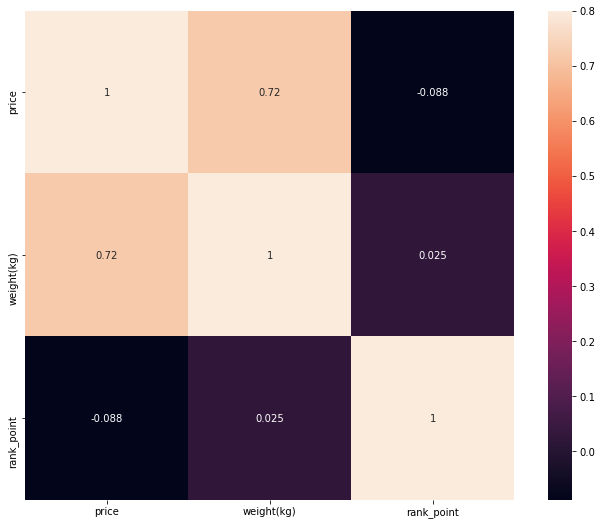

spearman correlation heatmap



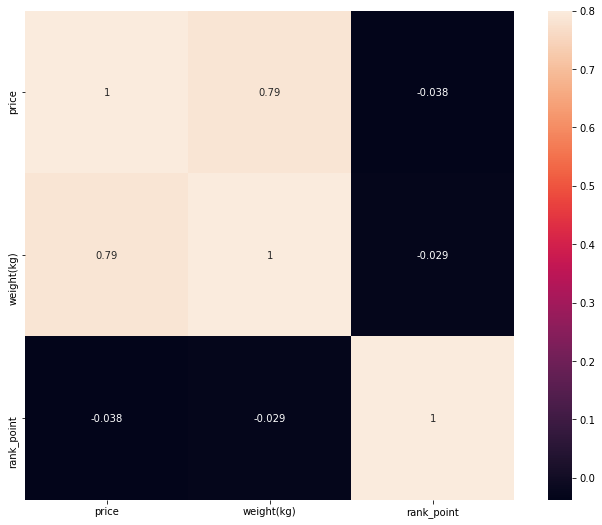

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
def print_heatmap(cor_method):
  corrmat = rank_data.corr(method=cor_method)
  print("{} correlation heatmap\n".format(cor_method))
  f, ax = plt.subplots(figsize=(12, 9))
  sns.heatmap(corrmat,annot= True, vmax=.8, square=True)
  plt.show()
print_heatmap('pearson')
print_heatmap('spearman')

In [22]:
from sklearn.preprocessing import StandardScaler

Standard_scaler = StandardScaler()
Xtrans = Standard_scaler.fit_transform(Xtrans)

In [23]:
rank_data_scaled = pd.DataFrame(Xtrans,index=rank_data.index, columns=rank_data.columns)

In [24]:
from skcriteria import Data, MIN, MAX
ranking = Data(
    rank_data_scaled,
    [MIN, MIN, MAX],
    cnames = rank_data.columns,
    weights = [10,1,10]
)

In [25]:
from skcriteria.madm import simple
dm = simple.WeightedSum(mnorm = "sum",wnorm = "sum")
dec = dm.decide(ranking)

/Users/nguyentuandung/opt/anaconda3/lib/python3.8/site-packages/skcriteria/norm.py:579: RuntimeWarning: divide by zero encountered in true_divide
  mincrits_inverted = 1.0 / arr[:, mincrits]


In [26]:
rank_data['rank'] = dec.rank_
rank_data.sort_values(by=['rank'])

,price,weight(kg),rank_point,rank
153,8.250000e+06,62.000000,108.000987,1
0,5.999000e+06,68.000000,102.783709,2
18,8.490000e+06,62.000000,76.047166,3
11,3.650000e+06,29.333333,70.570359,4
1,6.589000e+06,46.666667,66.756388,5
4,6.049000e+06,68.000000,45.638402,6
230,8.290000e+06,70.000000,39.447997,7
206,7.690000e+06,62.000000,37.825134,8
251,8.279000e+06,38.000000,37.281132,9
223,6.590000e+06,38.000000,33.981472,10


In [27]:
cols_to_keep = ['index', 'name', 'brand', 'number_of_comment', 'Negative', 'Positive']
group_data = group_data.drop(group_data.columns.difference(cols_to_keep), axis=1)

In [28]:
pd.concat([group_data, rank_data], axis=1, join="inner").to_csv('washing_machine_done.csv')